# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [34]:
# import necessary packages
import pandas as pd                      
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('Desktop/1520467485_dsc_human_temp/EDA_human_temperature/data/human_body_temperature.csv')

temperature=df['temperature']
gender=df['gender']
heart_rate=df['heart_rate']

# functions used in this notebook

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

temperature=df['temperature']
gender=df['gender']
heart_rate=df['heart_rate']

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1): #1D case, func is statistics of interest i.e. np.mean, np.std
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [5]:
# Your work here.

(130, 3)
100.8
96.3
count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64


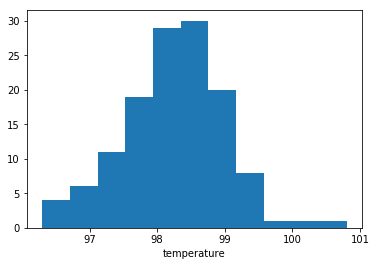

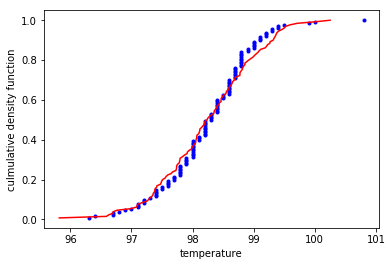

In [23]:
print(df.shape)
print(df['temperature'].max())   #check if there is any outlier
print(df['temperature'].min()) #seems like the temperature is quite normal in this data set
print(df['temperature'].describe())

_=plt.hist(df['temperature'], bins=int(np.sqrt(len(df.temperature)))) #NO. of bins are chosen to be sqrt(len(df.temperature))
_=plt.xlabel('temperature')
plt.show()

theor_norm=np.random.normal(np.mean(df['temperature']), np.std(df['temperature']), len(df['temperature']))
x_act, y_act = ecdf(temperature)
x_theor, y_theor = ecdf(theor_norm)

_=plt.plot(x_act, y_act, marker='.', linestyle='none', color='blue')
_=plt.plot(x_theor, y_theor, color='red')
_=plt.xlabel('temperature')
_=plt.ylabel('culmulative density function')

plt.show()
# After plotting CDF, we see that it's actually normally distribute.
# On the second graph, the blue dots are the actually temperature and red line is the thoeretical normally distributed
# temperature that we simulated

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64
count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64
0.2536564027207642


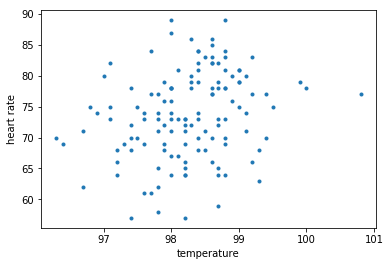

In [43]:
print(df['temperature'].loc[df['gender'] == 'M'].describe())
print(df['temperature'].loc[df['gender'] == 'F'].describe())
corr=pearson_r(temperature, heart_rate)
print(corr)

# it seems like the temperature distrubution is independent to gender and heart rate
# no, the data is not large enough, we can use permutation method to simulate more data and it will be done next problem!

_=plt.plot(temperature, heart_rate, marker='.', linestyle='none')
_=plt.xlabel('temperature')
_=plt.ylabel('heart rate')
plt.show()

In [70]:
# we use one sample hypothesis test because we are only given one sample
# z-test is preferable in this case
# because we are given population mean of 98.6F 
# if we only know sample mean, t-test works better
# first, we will set up bootstrap replicates by the function we already wrote up

bs_temp_mean = draw_bs_reps(temperature, np.mean, 10000).mean() # we permuate the data set 10000 times and many more times
                                                                # we keep getting mean around 98.25 from this data set
                                                                # it's actually quite different from the pop. mean of 98.6
print(bs_temp_mean)

# next, we will try using one sample hypothesis test
# H_0: 98.6F is the actual mean of the sample
# H_a: alternative hypothesis that 98.6 is not the mean of the sample

translated_temp = temperature - np.mean(temperature) + 98.6
bs_replicates = draw_bs_reps(translated_temp, np.mean, 10000)
p = np.sum(bs_replicates <= np.mean(temperature))/len(bs_replicates)
print('p-value is', p)

# we reject the hypothesis
# the p value in this case is even 0 so this sample cannot represent the population mean
# after doing other tests, we keep getting the similar results
# i testes many different population means, the most likely mean sample mean for this data is 98.3 with high a p-value

98.2485716153846
p-value is 0.0


In [79]:
# before we do z- and t- test, we decided that the confidence interval, alpha, is 0.05
# now, let's randomly draw 10 data from temperature column
sample_10 = np.random.choice(temperature, size=10)
print(sample_10.mean(), sample_10.std())
print(np.mean(temperature))
# because we chose alpha to be 0.05 if the z-score is out of (-1.96, 1.96) so reject this hypothesis

# we won't be able to do t-test, because we only have one sample

98.84 0.8499411744350336
98.24923076923078


In [94]:
# to find extreme outliers of temperature find 99% confidence interval 
resampled_temp = np.random.choice(temperature, size = 1000)
conf_int = np.percentile(resampled_temp, [0.5, 99.5])
print(conf_int)
print('any temperature out of', conf_int, 'is considered an outlier of this data set')

[ 96.3995 100.004 ]
any temperature out of [ 96.3995 100.004 ] is considered an outlier of this data set


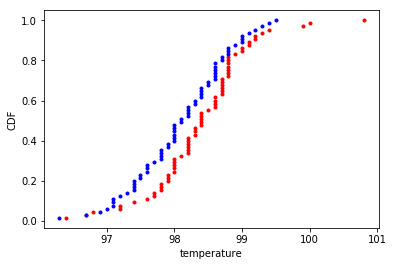

In [106]:
female = np.array(df['temperature'].loc[df['gender'] == 'F'])
male = np.array(df['temperature'].loc[df['gender'] == 'M'])

x_f, y_f = ecdf(female)
x_m, y_m = ecdf(male)

_=plt.plot(x_f, y_f, marker='.', linestyle='none', color='red')
_=plt.plot(x_m, y_m, marker='.', linestyle='none', color='blue')
_=plt.xlabel('temperature')
_=plt.ylabel('CDF')

plt.show()

#yes, there is a significant difference between men and women body temperature